# Klasifikasi Gambar Kucing dan Anjing

Pada project ini kita akan belajar melatih model Convolutional Neural Network (CNN) agar bisa mengklasifikasikan gambar kucing dan anjing. Data yang digunakan dapat anda download di website Kaggle.

Link dataset: https://www.kaggle.com/datasets/tongpython/cat-and-dog

## Tujuan
Adapun tujuan project ini adalah sebagai bahan edukasi tentang pengaplikasian model deep learning yaitu CNN untuk klasifikasi data gambar.

### Persiapan

In [1]:
# Instal library kaggle
! pip install -q kaggle

In [2]:
# Upload file kaggle.json yang anda dapatkan dari akun Kaggle anda
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramadhany","key":"96b915033734bae3305394b8cb72d088"}'}

In [3]:
# Menyiapkan file kredensial Kaggle API
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download dataset dari Kaggle
! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 60% 130M/218M [00:00<00:00, 1.33GB/s]
100% 218M/218M [00:00<00:00, 998MB/s] 


In [5]:
# Ekstrak file zip dataset
! unzip /content/cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [6]:
# import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [7]:
# lokasi dataset training
train_path = '/content/training_set/training_set'

# lokasi dataset testing
test_path = '/content/test_set/test_set'

In [8]:
# Melakukan augmentasi pada data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Melakukan augmentasi pada data testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# memuat train dataset
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# memuat test dataset
test_dataset = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Explorasi Data

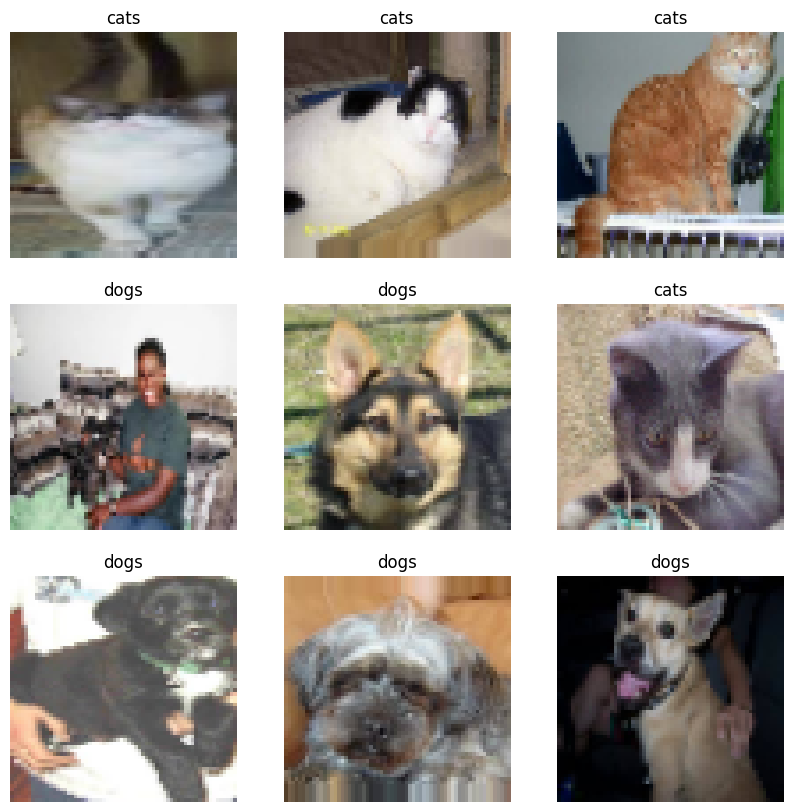

In [10]:
# Melihat gambar dari setiap label/class secara acak
img, labels = next(iter(train_dataset))

class_names = train_dataset.class_indices
class_names = {v: k for k, v in class_names.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[i])
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.show()




In [11]:
# Menghitung distribusi class pada set training dan test
train_labels = train_dataset.classes
test_labels = test_dataset.classes

train_class_counts = np.bincount(train_labels)
test_class_counts = np.bincount(test_labels)



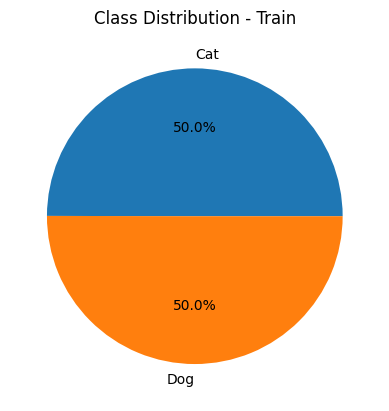

In [12]:
# Visualisasi perbandingan jumlah label pada data training
plt.pie(train_class_counts, labels=['Cat', 'Dog'], autopct='%1.1f%%')
plt.title('Class Distribution - Train')
plt.show()


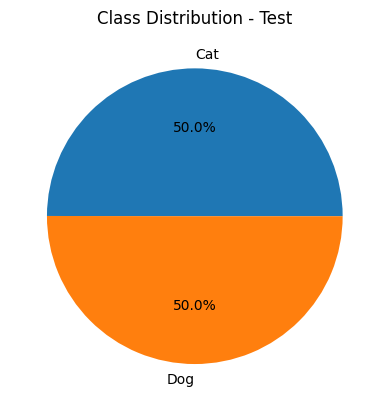

In [13]:
# Visualisasi perbandingan jumlah label pada data testing
plt.pie(test_class_counts, labels=['Cat', 'Dog'], autopct='%1.1f%%')
plt.title('Class Distribution - Test')
plt.show()

### Mulai Melatih Model

In [26]:
# Membangun model CNN
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [23]:
# Membuat callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [27]:
# kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Melatih model
history = model.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[callback])

Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 0.5363 - loss: 0.6918 - val_accuracy: 0.6204 - val_loss: 0.6580
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.6244 - loss: 0.6531 - val_accuracy: 0.6891 - val_loss: 0.5948
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6912 - loss: 0.5845 - val_accuracy: 0.7316 - val_loss: 0.5478
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7063 - loss: 0.5518 - val_accuracy: 0.7469 - val_loss: 0.5141
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7508 - loss: 0.5077 - val_accuracy: 0.7687 - val_loss: 0.4794
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7724 - loss: 0.4810 - val_accuracy: 0.7919 - val_loss: 0.4463
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7832 - loss: 0.4511 - val_accuracy: 0.7612 - val_loss: 0.4863
Epoch 8/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8028 - loss: 

In [29]:
# Uji dengan data testing
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8456 - loss: 0.5242
Test accuracy: 0.8452792763710022


In [33]:
# Export model
model.save('trained_model.h5')

### Menguji model dengan gambar dari komputer anda

In [34]:
# Memuat model
model = tf.keras.models.load_model('/content/trained_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Kucing


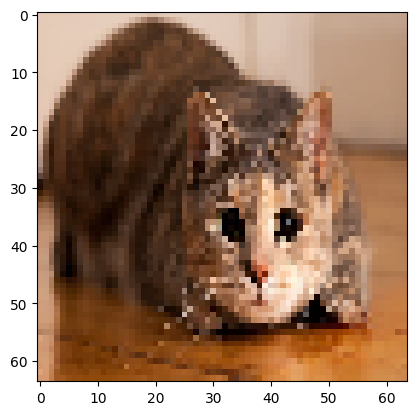

In [35]:
img = '/content/Kucing.jpg'
img = image.load_img(img, target_size=(64, 64))

# ubah gambar menjadi array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# prediksi
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print('Anjing')
else:
    print('Kucing')

# tampilkan gambar
plt.imshow(img)
plt.show()






